In [2]:
%matplotlib inline
import pickle
import pandas 
import numpy 
import random
import matplotlib.pyplot as plt
import re
from operator import itemgetter
from IPython.core.display import HTML
pandas.set_option('display.max_rows', 5000)
import platform
print platform.python_version()


2.7.12


In [3]:
import sys
sys.path.append('../ud120-projects/outliers/')

In [55]:

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """

    cleaned_data = []

    ### your code goes here
    for i in range(90):
        t = ((ages[i][0],net_worths[i][0], abs(net_worths[i] - predictions[i])[0]))
#        print t
        cleaned_data.append(t)
        
    
    
    cleaned_data.sort(key=lambda x: x[2])
    
    return cleaned_data[0:81]

In [56]:







### load up some practice data with outliers in it
ages = pickle.load( open("../ud120-projects/outliers/practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("../ud120-projects/outliers/practice_outliers_net_worths.pkl", "r") )

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like


from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train,net_worths_train)

print reg.coef_
print reg.intercept_

print reg.score(ages_test,net_worths_test)



[[ 5.07793064]]
[ 25.21002155]
0.878262470366


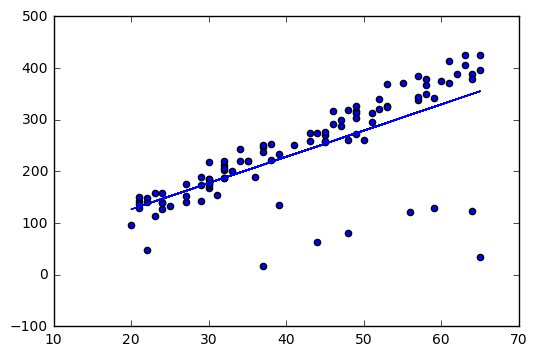

In [57]:


try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"






In [58]:
cleaned_data

[(30, 177.46485912830926, 0.0830817205342953),
 (32, 187.09760490789751, 0.60619722782655572),
 (29, 173.54835439167368, 1.0783441862703853),
 (32, 186.46155999388083, 1.242242141843235),
 (49, 271.75164334973937, 2.2769797244690722),
 (45, 256.83312700057957, 3.1162265001321714),
 (38, 221.33012794213624, 3.1587419457706574),
 (21, 128.4847139765763, 3.3618510813049625),
 (22, 140.9273656237994, 4.0028699224778848),
 (21, 136.08924543132068, 4.2426803734394127),
 (45, 259.12330051987942, 5.4064000194320272),
 (24, 140.78722458080426, 6.2931324073977635),
 (33, 200.22792608821422, 7.4461933090499031),
 (30, 185.1870343522352, 7.6390935033916492),
 (24, 139.40479592465923, 7.6755610635428013),
 (48, 260.8065975224045, 8.1440949083636838),
 (30, 186.05979756839332, 8.511856719549769),
 (21, 142.1012008717193, 10.254635813838036),
 (30, 167.24337759331152, 10.304563255532031),
 (27, 151.96564953554724, 10.348499382975547),
 (24, 157.51396036691344, 10.43360337871141),
 (51, 294.8258675183

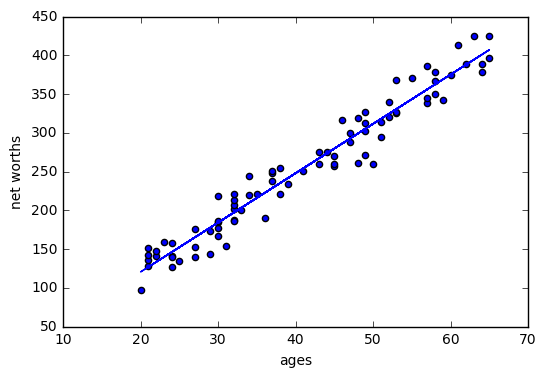

[[ 6.36859481]]
[-6.91861069]


In [60]:



### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()

    print reg.coef_
    print reg.intercept_

else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

In [61]:
print reg.score(ages_test,net_worths_test)

0.983189455396


# enron data

In [73]:

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../ud120-projects//tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../ud120-projects/final_project/final_project_dataset.pkl", "r") )
data_dict.pop('TOTAL',0)
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below




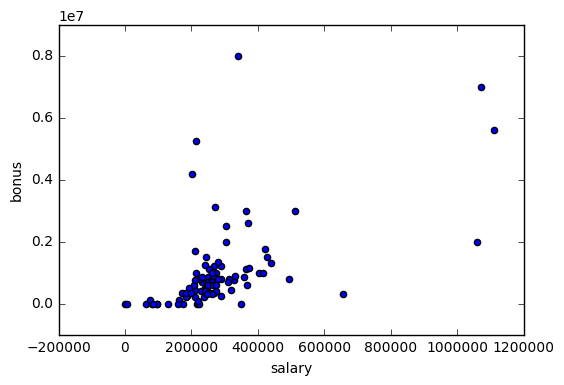

In [74]:
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

KeyError: 'TOTAL'

In [75]:
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [78]:
keys = sorted(data_dict.keys())

In [79]:
keys

['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'GAHN 